# **Day - 6**
# **Dataset and DataLoaders**

* ####  in our previous training flow / pipeline we learnt previously have a very big flaw, **to train model we were/are using batch gradient descent (means to update our training parameters 1 time, we are using all the dataset at once)**

* #### Generally we do not use Batch GD, problems are ; (memory inefficient and no better convergence)

* ####  it is not a good idea to pick up all the data at once and do computation on it


* ### Every thing Done previously is good BUT we have one flaw; which is we are using Batch GD which means , we are loading all the data at once and are updating parameter over it

* ### idealy we should load our data in batches

* ### **Sollution - Use Batches of data to train the model**


*rather then giving all 1000 dataset in memory and performing calculation over it, we should we divide our data in 10 batches, each with 100 rows and now you can do forward pass on 100 rows and calculate loss, gradient and then apply Gradient Descent and do this 10 times (this is called mini batch gradient descent)*

---

## **Simple Solution (Manual Code)**
* use two loops , one for epochs and second for running the batches
* for mini batch GD

---

- Training a neural network with batches is just like reading a book in small sections.

- You don't rewrite or split the book every time.
- The book stays the same — you just read a few pages at a time.

- In each epoch:

    - You take pages 0–32 (batch 1) and read them

    - Then pages 33–64 (batch 2)

    - And continue until the end of the book

- Next epoch, you go back to the start and read the same pages again — but now you understand the book a little better.
Similarly, every batch helps the model learn a little bit.

- So batching is simply:
 Read the same book again and again, but always in small chunks, so the model learns efficiently without using too much memory.


In [ ]:
batch_size = 32 # lets say we have 320 rows so we are keeping 32 rows in one batch so we will have total 10 batches
epochs = 25
n_samples = len(X_train_tensor)

for epoch in range(epochs): # for one epochs we do the below
    # Simply loop over the dataset in chunks of 'batch_size'
    for start_idx in range(0, n_samples, batch_size): # for each batch we do the below
        end_idx = start_idx + batch_size
        X_batch = X_train_tensor[start_idx:end_idx]
        y_batch = y_train_tensor[start_idx:end_idx]

        # Forward pass
        y_pred = model(X_batch)
        loss = loss_function(y_pred, y_batch.view(-1, 1))

        # Update step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


## **BUT this above manual mini batch GD has many problems :**

---
* ### **no standard interface for data** : now we are making batches from (x_train_tensor and y_train_tensor) all dataset, BUT let say we are making cat vs dog classifier and we have folder of dog and cat images, so we have to take that those images and make x_train_tensor and y_train_tensor and then implement the above manual code

---

* ### **no easy way to apply transfomation** : it may happen that we want to apply transformation on each batch before sending it ( transformation - coloured image to black and white ) no way to do that in above code

---

* ### **shuffling and sampling** : if we create dataset directly then we will have first 100 dogs images and next 100 cats BUT the better strategy must be to shuffle then do the sampling

---

* ### **batch management and parallelizaiton**: lets say we have to extract  image batches and we want to do it parally, so in this manual code we don't have idea on how to do it

---

*code works BUT is not most efficient code, this is not the way to make scalable deep learning model on realworld dataset*

---

### **To solve this problem pytorch gives us 2 classes :**  
* *Dataset* → How to store and fetch individual rows of data
* *Dataloaders*  → How to give data to the model in batches


# **The Dataset and DataLoader Classes**

### dataset and data loaders are core abstraction in pytorch that decouples how you define your data from how you efficiently iterate over it in training loops (with help of both classes hum data ko load karne ka process and iterate kar ke nn train karne ke process ko alag alag karte h )



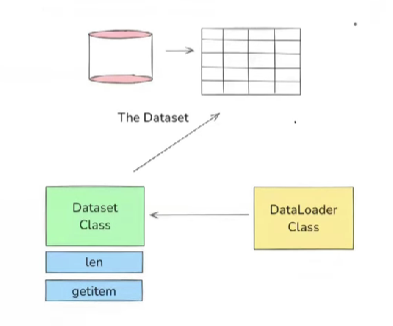

---

* Data is some where in the memory, so *Dataset Class* loads the data one by one
* *Data Loader Class* makes batches and decides no. of rows per batch[it tells the dataset class to load the data from memmory]
* then these batches will be sent to training loop

---

example :

*we have csv data of 10 rows and we made batch size of 2, so total no. of batches will be 5, first we have to make a class (;ets sat - custom dataset) and it inherits from DatasetClass (this is an abstract class in pytorch, it is basicly a blueprint which tells how a dataset will look like in pytorch)*

---

## **Dataset Class**
* ### The dataset class is essentially a blue print, when you create a custom dataset, you decide how data is loaded and returned

* ### It defines, we have to make 3 methods:
    - __init__() : first we have to make a constructor; it tells how data should be loaded ( and from where)[in this write logic to load data from the memory]

    * __len__(): it should return the total number of sample( tells total no. of batches kitne banenge)

    * __getitem__(index): which returns the data (and label) at the given index(10th item return karega in index is 10)
---

## **DataLoader Class**
* ### the dataloader wraps a dataset and handles batching, shuffling and parallel loading for you

* ### data loader control flow:


    - at the start of each epoch, the *DataLoader*(if shuffle = True) shuffles indices(using a sampler)
    [ at start of epochs take all the index and shuffle with help of sampler]
    [0,1,2,3,4,5,6,7,8,9] to
    [4,9,5,6,7,2,8,1,3,0]

    - it divides the indices into chunks of batch_size [take suffle index and make chunks of batch size]
    [(4,9),(5,6),(7,2),(8,1),(3,0)]

    - for each index in the chunk, data samples are fetched from the Dataset object ( next all the chunk indices are sent to customdataset class to __getitem__(index) method ; (4,6) sent, get item 4 then get item 6 data, we have data of 4th and 6th now we have to collect, combine and make batch by collate_fn)

    - the samples are then collected and combined into a batch(using *collate_fn*)

    - the batch is returned to the main training loop (one by one all the batch will be sent to out training pipeline for training)

---

### Example :

In [ ]:
# Making custom dataset

from sklearn.datasets import make_classification
import torch

# Step 1: Create a synthetic classification dataset using sklearn
X, y = make_classification(
    n_samples=10,       # Number of samples
    n_features=2,       # Number of features
    n_informative=2,    # Number of informative features
    n_redundant=0,      # Number of redundant features
    n_classes=2,        # Number of classes
    random_state=42     # For reproducibility
)


In [ ]:
X.shape

(10, 2)

In [ ]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
y.shape

(10,)

In [ ]:
# Convert the data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

In [ ]:
X

tensor([[ 1.0683, -0.9701],
        [-1.1402, -0.8388],
        [-2.8954,  1.9769],
        [-0.7206, -0.9606],
        [-1.9629, -0.9923],
        [-0.9382, -0.5430],
        [ 1.7273, -1.1858],
        [ 1.7774,  1.5116],
        [ 1.8997,  0.8344],
        [-0.5872, -1.9717]])

In [ ]:
y

tensor([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
from torch.utils.data import DataLoader, Dataset

In [ ]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = features
    self.labels = labels

  def __len__(self):
    return self.features.shape[0] # no of rows in data

  def __getitem__(self, index):
    return self.features[index], self.labels[index]


In [ ]:
dataset = CustomDataset(X,y) # object ; Now dataset behaves like a python list of rows. But each row contains tensors (features + label); Holds the data and allows fetching 1 row at a time

In [ ]:
len(dataset)

10

In [ ]:
dataset[0] # can fetch o-th row data

(tensor([ 1.0683, -0.9701]), tensor(1))

In [ ]:
dataloader = DataLoader(dataset, batch_size = 2, shuffle=True)


"""Breaks data into batches

batch_size = 2 → each batch contains 2 rows
Example:

Batch 1 → rows [?, ?]
Batch 2 → rows [?, ?]
...

Shuffles the rows before batching

Good for training → prevents model from learning pattern in order of data"""

In [ ]:
for batch_features, batch_labels in dataloader:
  print(batch_features)
  print(batch_labels)

tensor([[-2.8954,  1.9769],
        [-0.7206, -0.9606]])
tensor([0, 0])
tensor([[-1.1402, -0.8388],
        [-0.5872, -1.9717]])
tensor([0, 0])
tensor([[ 1.7774,  1.5116],
        [-1.9629, -0.9923]])
tensor([1, 0])
tensor([[-0.9382, -0.5430],
        [ 1.7273, -1.1858]])
tensor([1, 1])
tensor([[ 1.8997,  0.8344],
        [ 1.0683, -0.9701]])
tensor([1, 1])


## **A Note about Transformation**

* ### in __defitems__(index) we can apply any type of transformation


```
class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = features
    self.labels = labels

  def __len__(self):
    return self.features.shape[0] # no of rows in data

  def __getitem__(self, index):

  # here we can apply any type of transformation
  # (image resize, black-n-white, augumentation,
  # text- lowecase, lamatization, stop words removal)

    return self.features[index], self.labels[index]
```
---


## **Parallelization**

* ### with the help of data loader we first shuffle, then make chunks, then pick first chunk send it to getitem in dataset it returns the data, combining both index data we create batch 1, then we do same to make batch 2 and so on, BUT we see that all of this is sequential BUT what if we can do it parally to make it very fast.

* ### so, we have a concept of worker in data loader, so we can implemet more then one workers, so batches can be made parally

---

### **A note about Parallelization - detail explanation**

Imagine the entire data loading and training process for one epoch with num_workers=4:

**Assumptions:**
• Total samples: 10,000
• Batch size: 32
• Workers (num_workers): 4
• Approximately 312 full batches per epoch (10000 / 32 ≈ 312).

**Workflow:**
**1. Sampler and Batch Creation (Main Process):**
Before training starts for the epoch, the DataLoader’s sampler generates a shuffled list of all 10,000 indices. These
are then grouped into 312 batches of 32 indices each. All these batches are queued up, ready to be fetched by
workers.

**2. Parallel Data Loading (Workers):**
* At the start of the training epoch, you run a training loop like:
```python
Copy code
for batch_data, batch_labels in dataloader:
# Training logic...
```


* Under the hood, as soon as you start iterating over dataloader, it dispatches the first four batches of indices
to the four workers:
    - Worker #1 loads batch 1 (indices [batch_1_indices])
    -  Worker #2 loads batch 2 (indices [batch_2_indices])
    -  Worker #3 loads batch 3 (indices [batch_3_indices])
    - Worker #4 loads batch 4 (indices [batch_4_indices])
Each worker:
* Fetches the corresponding samples by calling __getitem__ on the dataset for each index in that batch.
*  Applies any defined transforms and passes the samples through collate_fn to form a single batch tensor.

**3. First Batch Returned to Main Process:**
* Whichever worker finishes first sends its fully prepared batch (e.g., batch 1) back to the main process.
* As soon as the main process gets this first prepared batch, it yields it to your training loop, so your code for
batch_data, batch_labels in dataloader:receives (batch_data, batch_labels) for the first batch.

** 4. Model Training on the Main Process:**
* While you are now performing the forward pass, computing loss, and doing backpropagation on the first
batch, the other three workers are still preparing their batches in parallel.

* By the time you finish updating your model parameters for the first batch, the DataLoader likely has the
second, third, or even more batches ready to go (depending on processing speed and hardware).

** 5. Continuous Processing:**
* As soon as a worker finishes its batch, it grabs the next batch of indices from the queue.
* For example, after Worker #1 finishes with batch 1, it immediately starts on batch 5. After Worker #2
finishes batch 2, it takes batch 6, and so forth.

* This creates a pipeline effect: at any given moment, up to 4 batches are being prepared concurrently.

**6. Loop Progression:**
* Your training loop simply sees:
```
python
Copy code
for batch_data, batch_labels in dataloader:
# forward pass
# loss computation
# backward pass
# optimizer step
```

* Each iteration, it gets a new, ready-to-use batch without long I/O waits, because the workers have been pre-
loading and processing data in parallel.

**7. End of the Epoch:**
* After ~312 iterations, all batches have been processed. All indices have been consumed, so the DataLoader
has no more batches to yield.

* The epoch ends. If shuffle=True, on the next epoch, the sampler reshuffles indices, and the whole process
repeats with workers again loading data in parallel.


---

## **About Sampler**

### In PyTorch, the sampler in the DataLoader determines the strategy for selecting samples from the dataset during data loading. It controls how indices of the dataset are drawn for each batch.

#### **Types of Samplers**
PyTorch provides several predefined samplers, and you can create custom ones:
1. SequentialSampler:
    * Samples elements sequentially, in the order they appear in the dataset.
    * Default when shuffle=False.
2. RandomSampler:
    * Samples elements randomly without replacement.
    * Default when shuffle=True.
    * example -  when imbalanced dataset 1-99% so most value will come from one class only in that case we may need this custom sampler

    ---

## **About collate_fn**

### The collate_fn in PyTorch's DataLoader is a function that specifies how to combine a list of samples from a dataset into a single batch. By default, the DataLoader uses a simple batch collation mechanism, but collate_fn allows you to customize how the data should be processed and batched.

* why custom : what if the size of both the tensor is not the same ( so we have to write manual code to do padding(add 0) so this custom code will be written in collat_fn)

---

## **DataLoader Important Paramenters**

### The DataLoader class in PyTorch comes with several parameters that allow you to customize how data is loaded, batched, and preprocessed. Some of the most commonly used and important parameters include:


1. dataset (mandatory):
    * The Dataset from which the DataLoader will pull data.

    * Must be a subclass of torch.utils.data.Dataset that implements __getitem__ and
__len__.

2. batch_size:
    * How many samples per batch to load.

    * Default is 1.

    * Larger batch sizes can speed up training on GPUs but require more memory.

3. shuffle:
    * If True, the DataLoader will shuffle the dataset indices each epoch.

    * Helpful to avoid the model becoming too dependent on the order of samples.

4. num_workers:
    * The number of worker processes used to load data in parallel.

    * Setting num_workers > 0 can speed up data loading by leveraging multiple CPU cores, especially if I/O or preprocessing is a bottleneck.

5. pin_memory:
    * If True, the DataLoader will copy tensors into pinned (page-locked) memory before
returning them.

    * This can improve GPU transfer speed and thus overall training throughput, particularly on CUDA systems.


6. drop_last:
    * If True, the DataLoader will drop the last incomplete batch if the total number of samples is not divisible by the batch size.

    * Useful when exact batch sizes are required (for example, in some batch normalization scenarios).


7. collate_fn:
    * A callable that processes a list of samples into a batch (the default simply stacks tensors).

    * Custom collate_fn can handle variable-length sequences, perform custom batching logic, or handle complex data structures.

8. sampler:
* sampler defines the strategy for drawing samples (e.g., for handling imbalanced
classes, or custom sampling strategies).

* batch_sampler works at the batch level, controlling how batches are formed.

* Typically, you don’t need to specify these if you are using batch_size and shuffle.
However, they provide lower-level control if you have advanced requirements.


---


## **Improving our Existing Code**

In [1]:
# ( no change )
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#dataset
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')

#drop unnecessary column
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

#train test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

# standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#encoding
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# numpy to tensor
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [2]:
# first we make custom dataset class which inherit from Dataset
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = features
    self.labels = labels

  def __len__(self):
    return self.features.shape[0] # no of rows in data

  def __getitem__(self, index):
    return self.features[index], self.labels[index]



In [4]:
#making 2 dataset object one for training and one for testing

train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [6]:
train_dataset[10]

(tensor([-0.7529,  1.1326, -0.7284, -0.7237, -0.2353, -0.0168,  0.3228, -0.1926,
         -1.6170,  0.4542, -0.5809,  3.2197, -0.4410, -0.4923,  0.4190,  0.2428,
          0.9886,  0.1635, -0.6970,  0.3809, -0.7887,  1.9291, -0.7502, -0.7141,
         -0.0885, -0.0173,  0.4499, -0.2751, -1.2846,  0.1879]),
 tensor(0.))

In [7]:
#makeing data loaders

train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

In [8]:
# Defining the model ( same code )

import torch.nn as nn


class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

In [9]:
learning_rate = 0.1
epochs = 25

In [10]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loss function
loss_function = nn.BCELoss()

In [11]:
# TRAINING PIPELINE ( 2 loops used )

# define loop
for epoch in range(epochs):

  for batch_features, batch_labels in train_loader:

    # forward pass
    y_pred = model(batch_features)

    # loss calculate
    loss = loss_function(y_pred, batch_labels.view(-1,1))

    # clear gradients
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # parameters update
    optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.09554900228977203
Epoch: 2, Loss: 0.16780753433704376
Epoch: 3, Loss: 0.06668724864721298
Epoch: 4, Loss: 0.09313952922821045
Epoch: 5, Loss: 0.08651827275753021
Epoch: 6, Loss: 0.039962705224752426
Epoch: 7, Loss: 0.1376744657754898
Epoch: 8, Loss: 0.03872372955083847
Epoch: 9, Loss: 0.09303177148103714
Epoch: 10, Loss: 0.03570247069001198
Epoch: 11, Loss: 0.03634275868535042
Epoch: 12, Loss: 0.13159380853176117
Epoch: 13, Loss: 0.05376292020082474
Epoch: 14, Loss: 0.11172033846378326
Epoch: 15, Loss: 0.04362855479121208
Epoch: 16, Loss: 0.12595824897289276
Epoch: 17, Loss: 0.025446591898798943
Epoch: 18, Loss: 0.012535898014903069
Epoch: 19, Loss: 0.3128897249698639
Epoch: 20, Loss: 0.030449185520410538
Epoch: 21, Loss: 0.08905915915966034
Epoch: 22, Loss: 0.04449671134352684
Epoch: 23, Loss: 0.05407288670539856
Epoch: 24, Loss: 0.061013754457235336
Epoch: 25, Loss: 0.027731044217944145


In [12]:
# EVALUATION

# Model evaluation using test_loader
model.eval()  # Set the model to evaluation mode
accuracy_list = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        # Forward pass
        y_pred = model(batch_features)
        y_pred = (y_pred > 0.8).float()  # Convert probabilities to binary predictions

        # Calculate accuracy for the current batch
        batch_accuracy = (y_pred.view(-1) == batch_labels).float().mean().item()
        accuracy_list.append(batch_accuracy)

# Calculate overall accuracy
overall_accuracy = sum(accuracy_list) / len(accuracy_list)
print(f'Accuracy: {overall_accuracy:.4f}')


Accuracy: 0.9314
